In [2]:
# importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
# let's import our data

df=pd.read_csv(r"E:\marij perosnal projects\Python Projects new\project 4\movies.csv")

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
# let's see which column have how many null values
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# dropping all the null values

df=df.dropna()

In [6]:
# let's look towards the data types of our data
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# changing the data types of some columns

df["budget"]=df["budget"].astype('int64')
df["gross"]=df["gross"].astype('int64')
df["votes"]=df["votes"].astype('int64')


In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [9]:
# since release year of movies are not correct so we are going to find it from released column

df['new_date']=df["released"].str.split(",").str.get(1)

In [10]:
df["released_year"]=df['new_date'].str.split("(").str.get(0)

In [11]:
#dropping unrequired columns
df=df.drop(columns=['new_date','year'])

In [12]:
# dropping duplicates
df=df.drop_duplicates()

Text(0, 0.5, 'film_gross_earning')

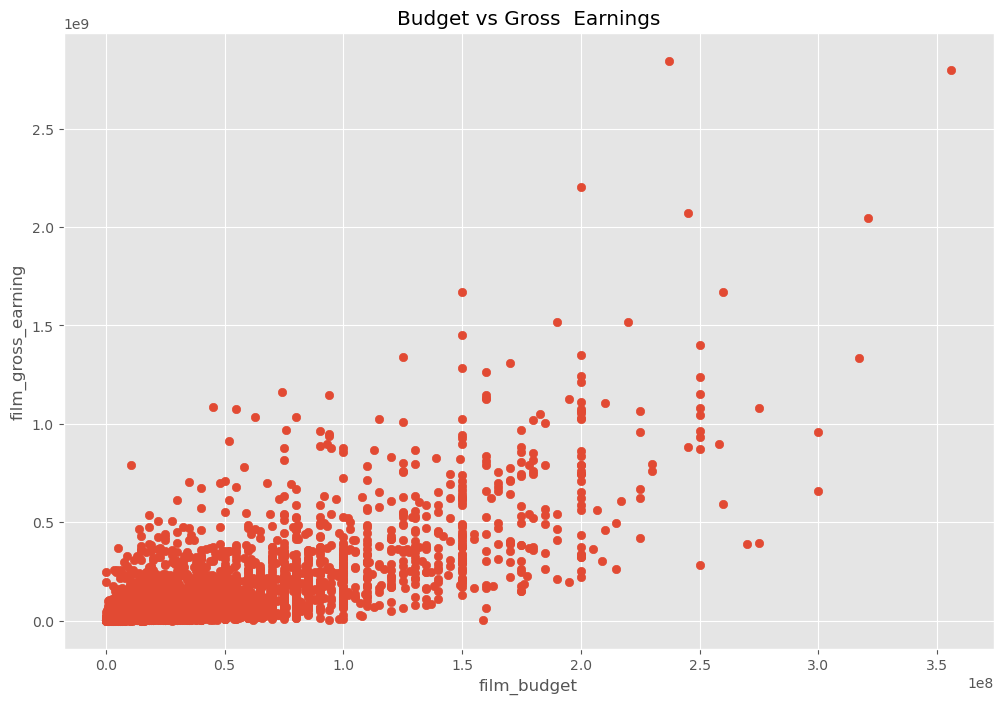

In [16]:
# let' see the correlation between gross and budget

plt.scatter(x=df["budget"],y=df["gross"])
plt.title("Budget vs Gross  Earnings")
plt.xlabel("film_budget")
plt.ylabel("film_gross_earning")

Text(0, 0.5, 'film_gross_earning')

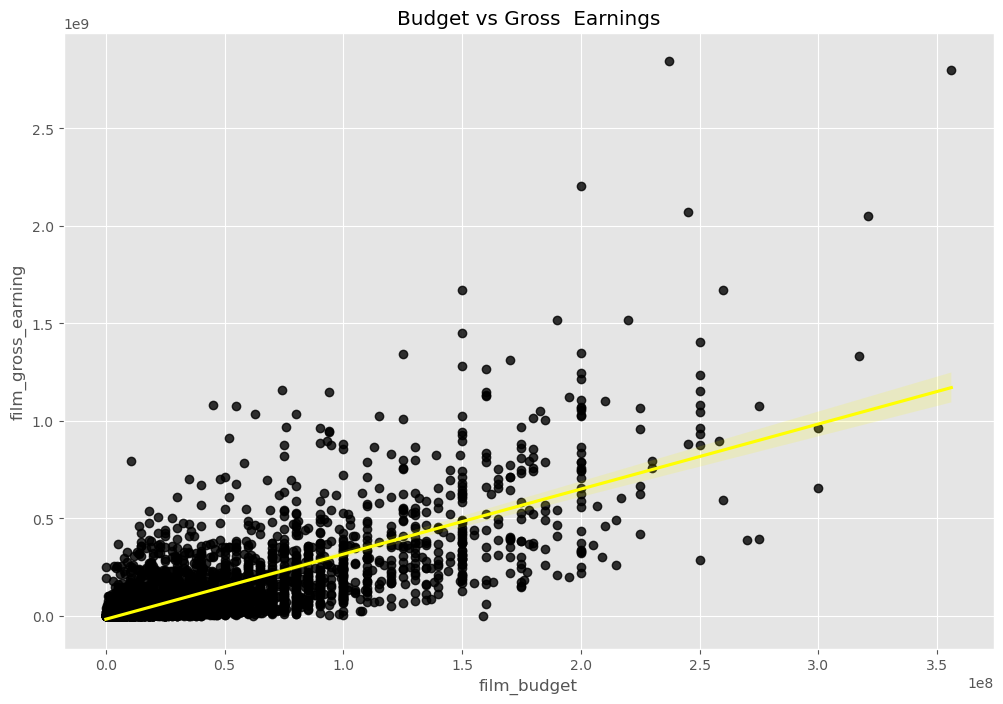

In [19]:
# plotting a scatter graph to see the comparison between budget and gross earning by seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"black"},line_kws={"color":"yellow"})

plt.title("Budget vs Gross  Earnings")
plt.xlabel("film_budget")
plt.ylabel("film_gross_earning")

In [22]:
# let' see the correlation between each numeric columns of our dataframe
# correlation methods are pearson,kendall,spearman

corr_matrix=df.corr(method='kendall')
corr_matrix

,score,votes,budget,gross,runtime
score,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.350185,1.000000,0.346274,0.553625,0.205344
budget,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.292254,0.205344,0.231278,0.176979,1.000000


Text(120.72222222222221, 0.5, 'Film_Features')

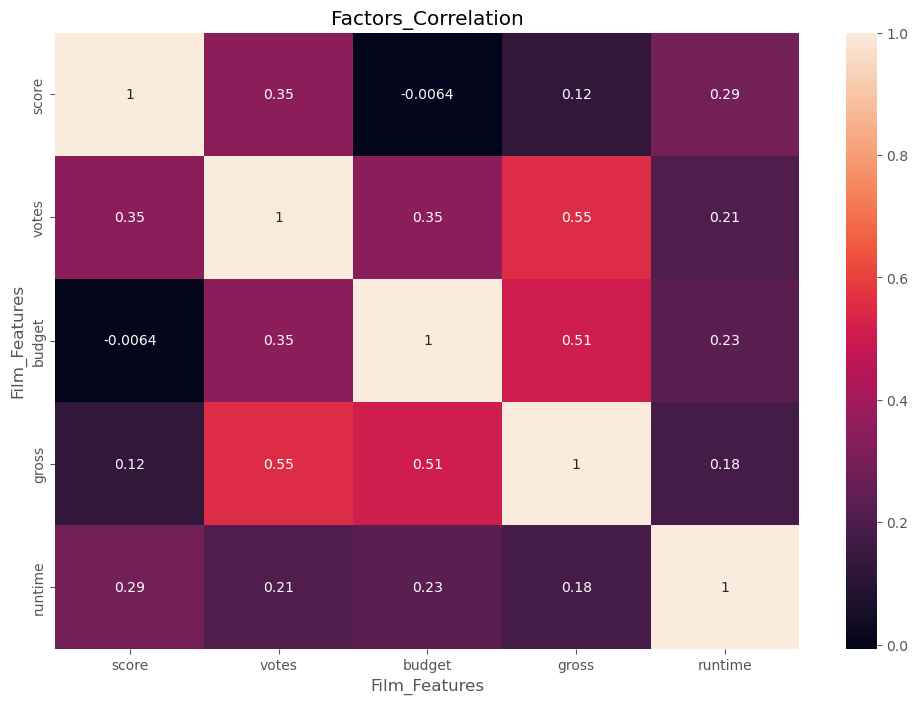

In [25]:
# now visualing our corr_matrix by an heatmap

sns.heatmap(corr_matrix,annot=True)
plt.title("Factors_Correlation")
plt.xlabel("Film_Features")
plt.ylabel("Film_Features")

# so votes and buget are highly correlated with gross earnings.

In [35]:
# let's answers few questions
df=df.sort_values(by='budget',ascending=False)

In [36]:
# what are the top 10 companies having most budget
df.groupby('company')['budget'].mean().sort_values(ascending=False).head(10)

company
B24                         245000000.0
Marvel Studios              222000000.0
The Halcyon Company         200000000.0
C-2 Pictures                200000000.0
Chris Morgan Productions    200000000.0
Jolie Pas                   180000000.0
Fairview Entertainment      175000000.0
FortyFour Studios           172500000.0
Roth Films                  170000000.0
Marvel Entertainment        170000000.0
Name: budget, dtype: float64

In [46]:
# what are the top 5 companies which produces more than 8 score movies

score_more_than_8=df[df['score']>8]
score_more_than_8.groupby('company')['score'].count().sort_values(ascending=False).head(5)

company
Warner Bros.               15
Universal Pictures          8
Paramount Pictures          6
Dreamworks Pictures         5
Pixar Animation Studios     4
Name: score, dtype: int64

In [47]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,"December 15, 2017 (United States)",7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0,2017
7066,Justice League,PG-13,Action,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,"May 25, 2007 (United States)",7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0,2007


In [56]:
# what are the top 5 years in which most  umbers of movies are produced

df.groupby('released_year')['name'].count().sort_values(ascending=False).head(5)

released_year
 2011     170
 2002     169
 2003     168
 2008     167
 2000     166
Name: name, dtype: int64